## Machine Learning Project

**o What are the most important features for predicting X as a target variable?**

**o Which classification approach do you prefer for the prediction of X as a target variable, and why?**

**o How to classify the loyal and churn customers using Support Vector Machines?**

**o Why is dimensionality reduction important in machine learning?**




**a) Logical justification based on the reasoning for the specific choice of machine learning approaches.**

**b) Multiple machine learning approaches (at least two) using hyperparameters and a comparison between the chosen modelling approaches.**

**c) Visualise your comparison of ML modelling outcomes. You may use a statistical approach to argue that one feature is more important than other features (for example, using PCA).**

**d) Cross-validation methods should be used to justify the authenticity of your ML results.**




**1. Motivation, a description of the problem domain, and an explanation of how the project's goals are justified using Prediction /Classification / Clustering Rules / Dimensionality Reduction etc.. (10 marks)**

**2. Characterization of data, explanation and description of techniques used for the variation in the accuracy across three training splits (10% / 20%/ 30%) using cross validation techniques. (30 marks)**

**3. Interpret and explain the results obtained, discuss overfitting / underfitting / generalisation, provide a rationale for the chosen model and use visualisations to support your findings. Comments in Python code, conclusions of the project should be specified at the end of the report. Harvard Style must be used for citations and references. (20 marks)**

**4. Each team member presents a PowerPoint presentation of their work (maximum 5 slides) to emphasize their distinctive contributions based on their involvement in the project's conceptual understanding, code development, and deployment. (20 marks individual)**

**5. Each team member fully described their individual contributions to the project in a reflective journal, using at least 500 to 700 words as well as images, diagrams, figures, and visualizations to elaborate his/ her work. (20 marks individual)**


#### Introduction

#### Data Collection

In [68]:
%matplotlib inline
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df= pd.read_csv("Traffic_Crashes_-_Crashes.csv")

In [2]:
df.shape

(746498, 49)

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,012c5bfce715efb2f2b387d6dd86f9c13e9dc1809fb52a...,JG341943,NaN,07/12/2023 03:05:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/15/2023 11:30:00 AM,IMPROPER TURNING/NO SIGNAL,UNABLE TO DETERMINE,4754,W,63RD ST,813.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,15,4,7,41.778542,-87.742065,POINT (-87.742064741348 41.778541938106)
1,01d457f032e23d935a0b8f6b4c88221375180ffd4cd959...,JG338388,NaN,07/12/2023 05:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",07/12/2023 06:41:00 PM,FOLLOWING TOO CLOSELY,NOT APPLICABLE,8300,S,PULASKI RD,834.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,17,4,7,41.742131,-87.721824,POINT (-87.72182410033 41.742130554062)
2,02249b4747a4bf40b88a8357304a98dfeaef9c38eebbf0...,JG350008,NaN,07/12/2023 02:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,OTHER OBJECT,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,"RUT, HOLES",NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,Y,NaN,"$501 - $1,500",07/21/2023 10:10:00 AM,NOT APPLICABLE,NOT APPLICABLE,9615,S,STONY ISLAND AVE,431.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,4,7,41.719844,-87.584790,POINT (-87.584789974824 41.719844228292)
3,03e3b6caad71b78ed9ae325648effa9512bfb2517aed30...,JG338049,NaN,07/12/2023 07:05:00 AM,30,TRAFFIC SIGNAL,UNKNOWN,FREEZING RAIN/DRIZZLE,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",07/12/2023 02:18:00 PM,FOLLOWING TOO CLOSELY,UNABLE TO DETERMINE,2370,N,ASHLAND AVE,1811.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7,4,7,41.925105,-87.668291,POINT (-87.668291181568 41.925104953308)
4,0481fc919b38f1572d4ba04b069766102d904a662ff096...,JG338431,NaN,07/12/2023 06:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/12/2023 07:15:00 PM,FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,5200,N,ELSTON AVE,1623.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,4,7,41.975258,-87.751991,POINT (-87.751990557158 41.97525809527)


In [4]:
#nan_graph_1=msno.matrix(df.sample(axis=1, n=49))

In [5]:
df.isnull().sum()

CRASH_RECORD_ID                       0
RD_NO                              4307
CRASH_DATE_EST_I                 690109
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         547494
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       21222
CRASH_TYPE                            0
INTERSECTION_RELATED_I           575368
NOT_RIGHT_OF_WAY_I               711724
HIT_AND_RUN_I                    513706
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


"MOST_SEVERE_INJURY" will be our Target varible. As you can see there are 5 possible outcomes and 1630 Null values. We will need to address the fact that "NO INDICATION OF INJURY" occurs 643k times but "FATAL" only occurs 812.

In [6]:
df["MOST_SEVERE_INJURY"].unique()

array(['NO INDICATION OF INJURY', 'REPORTED, NOT EVIDENT',
       'NONINCAPACITATING INJURY', 'INCAPACITATING INJURY', nan, 'FATAL'],
      dtype=object)

In [7]:
df["MOST_SEVERE_INJURY"].value_counts()

NO INDICATION OF INJURY     643460
NONINCAPACITATING INJURY     57308
REPORTED, NOT EVIDENT        30560
INCAPACITATING INJURY        12728
FATAL                          812
Name: MOST_SEVERE_INJURY, dtype: int64

In [8]:
df["INJURIES_UNKNOWN"].unique()

array([ 0., nan])

In [9]:
# from ydata_profiling import ProfileReport
# slice_df = df.iloc[:, :10]
# report = ProfileReport(df, title='My Data', minimal=True)
# report.to_file("Crushes_in_Chicago.html")

We proceed to cut off the constant variable "INJURIES_UNKNOWN" with number of Zeros (%)	99.8%

In [10]:
df = df.drop(columns=['INJURIES_UNKNOWN'])

We drop the features: "INJURIES_TOTAL", "INJURIES_FATAL", "INJURIES_INCAPACITATING", "INJURIES_NON_INCAPACITATING", "INJURIES_REPORTED_NOT_EVIDENT", "INJURIES_NO_INDICATION" as they count the outcome of our target varible. Using these in the model will create a model that will reliant on them of and won't be appliable for predicting new data. 

In [11]:
df = df.drop(columns=["INJURIES_TOTAL","INJURIES_FATAL","INJURIES_INCAPACITATING","INJURIES_NON_INCAPACITATING","INJURIES_REPORTED_NOT_EVIDENT","INJURIES_NO_INDICATION"])

We drop "CRASH_RECORD_ID" as it only has unique values

In [12]:
df =df.drop(columns='CRASH_RECORD_ID')

We proceed to cut off all the variables with 65% or more of missing values.

In [13]:
df = df.drop(columns=['CRASH_DATE_EST_I','LANE_CNT', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I','WORK_ZONE_TYPE', 'WORKERS_PRESENT_I'])

In [14]:
df.shape

(746498, 30)

Dropping all rows where our target varible is NAN.

In [15]:
df.dropna(subset=["MOST_SEVERE_INJURY"],inplace=True)

In [16]:
#df.isnull().sum()

Null values now are REPORT_TYPE which seems to be how police report the crash after the crash has happened, LATITUDE
LONGITUDE and LOCATION which report same info as STREET NO AND STREET NAME, recommand we just drop these three. RD_NO. adn few in STREET_DIRECTION, SREET_NAME and BEAT_OF_OCCURRENCE. Can drop these rows,10 rows isn't significate. 

In [17]:
df =df.drop(columns=['LATITUDE', 'LONGITUDE', 'LOCATION',])

In [18]:
df.dropna(subset=["STREET_DIRECTION", "STREET_NAME", "BEAT_OF_OCCURRENCE"],inplace=True)

After investigating the "RD_NO" feature a bit further, we discovered that it also only has Unique Values, so simularily to "CRASH_RECORD_ID" we are going to drop it. The dataset is now full cleaned. 

In [19]:
df['RD_NO'].describe()

count       740565
unique      740565
top       JG341943
freq             1
Name: RD_NO, dtype: object

In [20]:
df =df.drop(columns='RD_NO')

In [21]:
df =df.drop(columns=['REPORT_TYPE','CRASH_DATE',"STREET_NO","STREET_NAME", "STREET_DIRECTION","DATE_POLICE_NOTIFIED"])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744859 entries, 0 to 746497
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   POSTED_SPEED_LIMIT       744859 non-null  int64  
 1   TRAFFIC_CONTROL_DEVICE   744859 non-null  object 
 2   DEVICE_CONDITION         744859 non-null  object 
 3   WEATHER_CONDITION        744859 non-null  object 
 4   LIGHTING_CONDITION       744859 non-null  object 
 5   FIRST_CRASH_TYPE         744859 non-null  object 
 6   TRAFFICWAY_TYPE          744859 non-null  object 
 7   ALIGNMENT                744859 non-null  object 
 8   ROADWAY_SURFACE_COND     744859 non-null  object 
 9   ROAD_DEFECT              744859 non-null  object 
 10  CRASH_TYPE               744859 non-null  object 
 11  DAMAGE                   744859 non-null  object 
 12  PRIM_CONTRIBUTORY_CAUSE  744859 non-null  object 
 13  SEC_CONTRIBUTORY_CAUSE   744859 non-null  object 
 14  BEAT

[Text(0.5, 0, ' '), Text(0.5, 1.0, 'Number of Injury Type in Collision')]

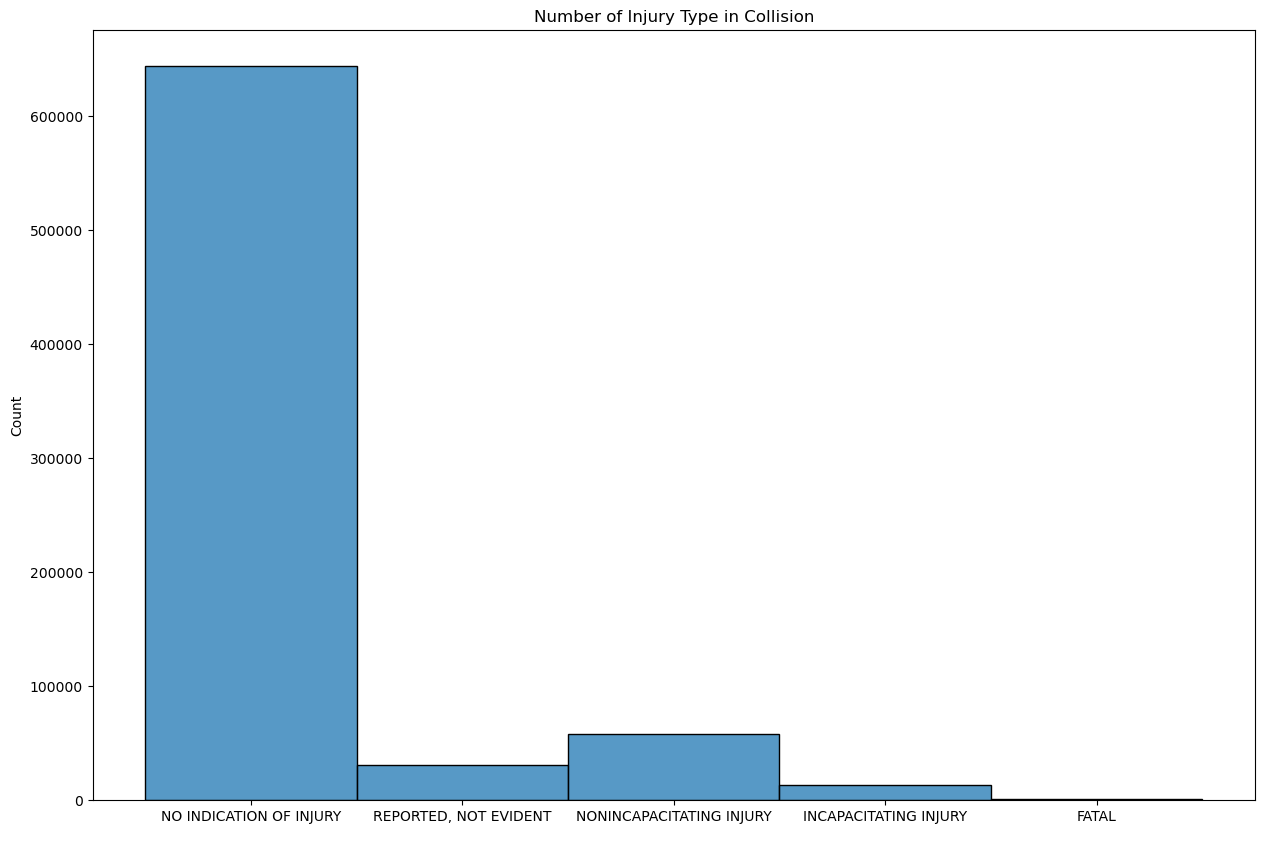

In [23]:
plt.figure(figsize=(15,10))
ax=sns.histplot(df,x='MOST_SEVERE_INJURY')
ax.set( xlabel=" ", title="Number of Injury Type in Collision")

#### Data Pre-processing

In [24]:
from sklearn.tree import DecisionTreeClassifier       
from sklearn.model_selection import train_test_split  
from sklearn import metrics                           
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import NearMiss
import warnings
warnings.filterwarnings('ignore')

We decided ro reduce 'NO INDICATION OF INJURY' into 101408 to encode our X target variable with the same numbers of values in 0 as no injuries and 1 as injuries

In [25]:
desired_samples = {
    'NO INDICATION OF INJURY': 101408,
    'NONINCAPACITATING INJURY': 57308,
    'REPORTED, NOT EVIDENT': 30560,
    'INCAPACITATING INJURY': 12728,
    'FATAL': 812
}


class_data = {}
for class_label in desired_samples.keys():
    class_data[class_label] = df[df['MOST_SEVERE_INJURY'] == class_label]


sampled_majority = class_data['NO INDICATION OF INJURY'].sample(n=desired_samples['NO INDICATION OF INJURY'], random_state=42)
sampled_df = pd.concat([sampled_majority] + [class_data[class_label] for class_label in class_data if class_label != 'NO INDICATION OF INJURY'])
sampled_df = sampled_df.sample(frac=1, random_state=42).reset_index(drop=True)


print(sampled_df['MOST_SEVERE_INJURY'].value_counts())

NO INDICATION OF INJURY     101408
NONINCAPACITATING INJURY     57308
REPORTED, NOT EVIDENT        30560
INCAPACITATING INJURY        12728
FATAL                          812
Name: MOST_SEVERE_INJURY, dtype: int64


In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

sampled_df['MOST_SEVERE_INJURY'] = label_encoder.fit_transform(sampled_df['MOST_SEVERE_INJURY'])


sampled_df['MOST_SEVERE_INJURY'] = sampled_df['MOST_SEVERE_INJURY'].replace(0, 1)
sampled_df['MOST_SEVERE_INJURY'] = sampled_df['MOST_SEVERE_INJURY'].replace(2, 0)
sampled_df['MOST_SEVERE_INJURY'] = sampled_df['MOST_SEVERE_INJURY'].replace(3, 1)
sampled_df['MOST_SEVERE_INJURY'] = sampled_df['MOST_SEVERE_INJURY'].replace(4, 1)



print(sampled_df['MOST_SEVERE_INJURY'].value_counts())

0    101408
1    101408
Name: MOST_SEVERE_INJURY, dtype: int64


Trasform all categorical features with dummies

In [27]:
categorical_features=['TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION','WEATHER_CONDITION','LIGHTING_CONDITION','FIRST_CRASH_TYPE','TRAFFICWAY_TYPE','ALIGNMENT','ROADWAY_SURFACE_COND','ROAD_DEFECT','CRASH_TYPE','DAMAGE','PRIM_CONTRIBUTORY_CAUSE','SEC_CONTRIBUTORY_CAUSE']
sampled_df=pd.get_dummies(sampled_df, columns= categorical_features)
sampled_df.head()

,POSTED_SPEED_LIMIT,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,TRAFFIC_CONTROL_DEVICE_BICYCLE CROSSING SIGN,TRAFFIC_CONTROL_DEVICE_DELINEATORS,TRAFFIC_CONTROL_DEVICE_FLASHING CONTROL SIGNAL,TRAFFIC_CONTROL_DEVICE_LANE USE MARKING,TRAFFIC_CONTROL_DEVICE_NO CONTROLS,TRAFFIC_CONTROL_DEVICE_NO PASSING,TRAFFIC_CONTROL_DEVICE_OTHER,TRAFFIC_CONTROL_DEVICE_OTHER RAILROAD CROSSING,TRAFFIC_CONTROL_DEVICE_OTHER REG. SIGN,TRAFFIC_CONTROL_DEVICE_OTHER WARNING SIGN,TRAFFIC_CONTROL_DEVICE_PEDESTRIAN CROSSING SIGN,TRAFFIC_CONTROL_DEVICE_POLICE/FLAGMAN,TRAFFIC_CONTROL_DEVICE_RAILROAD CROSSING GATE,TRAFFIC_CONTROL_DEVICE_RR CROSSING SIGN,TRAFFIC_CONTROL_DEVICE_SCHOOL ZONE,TRAFFIC_CONTROL_DEVICE_STOP SIGN/FLASHER,TRAFFIC_CONTROL_DEVICE_TRAFFIC SIGNAL,TRAFFIC_CONTROL_DEVICE_UNKNOWN,TRAFFIC_CONTROL_DEVICE_YIELD,DEVICE_CONDITION_FUNCTIONING IMPROPERLY,DEVICE_CONDITION_FUNCTIONING PROPERLY,DEVICE_CONDITION_MISSING,DEVICE_CONDITION_NO CONTROLS,DEVICE_CONDITION_NOT FUNCTIONING,DEVICE_CONDITION_OTHER,DEVICE_CONDITION_UNKNOWN,DEVICE_CONDITION_WORN REFLECTIVE MATERIAL,"WEATHER_CONDITION_BLOWING SAND, SOIL, DIRT",WEATHER_CONDITION_BLOWING SNOW,WEATHER_CONDITION_CLEAR,WEATHER_CONDITION_CLOUDY/OVERCAST,WEATHER_CONDITION_FOG/SMOKE/HAZE,WEATHER_CONDITION_FREEZING RAIN/DRIZZLE,WEATHER_CONDITION_OTHER,WEATHER_CONDITION_RAIN,WEATHER_CONDITION_SEVERE CROSS WIND GATE,WEATHER_CONDITION_SLEET/HAIL,WEATHER_CONDITION_SNOW,WEATHER_CONDITION_UNKNOWN,LIGHTING_CONDITION_DARKNESS,"LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD",LIGHTING_CONDITION_DAWN,LIGHTING_CONDITION_DAYLIGHT,LIGHTING_CONDITION_DUSK,LIGHTING_CONDITION_UNKNOWN,FIRST_CRASH_TYPE_ANGLE,FIRST_CRASH_TYPE_ANIMAL,FIRST_CRASH_TYPE_FIXED OBJECT,FIRST_CRASH_TYPE_HEAD ON,FIRST_CRASH_TYPE_OTHER NONCOLLISION,FIRST_CRASH_TYPE_OTHER OBJECT,FIRST_CRASH_TYPE_OVERTURNED,FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE,FIRST_CRASH_TYPE_PEDALCYCLIST,FIRST_CRASH_TYPE_PEDESTRIAN,FIRST_CRASH_TYPE_REAR END,FIRST_CRASH_TYPE_REAR TO FRONT,FIRST_CRASH_TYPE_REAR TO REAR,FIRST_CRASH_TYPE_REAR TO SIDE,FIRST_CRASH_TYPE_SIDESWIPE OPPOSITE DIRECTION,FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION,FIRST_CRASH_TYPE_TRAIN,FIRST_CRASH_TYPE_TURNING,TRAFFICWAY_TYPE_ALLEY,TRAFFICWAY_TYPE_CENTER TURN LANE,TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN (NOT RAISED),TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN BARRIER,TRAFFICWAY_TYPE_DRIVEWAY,"TRAFFICWAY_TYPE_FIVE POINT, OR MORE",TRAFFICWAY_TYPE_FOUR WAY,TRAFFICWAY_TYPE_L-INTERSECTION,TRAFFICWAY_TYPE_NOT DIVIDED,TRAFFICWAY_TYPE_NOT REPORTED,TRAFFICWAY_TYPE_ONE-WAY,TRAFFICWAY_TYPE_OTHER,TRAFFICWAY_TYPE_PARKING LOT,TRAFFICWAY_TYPE_RAMP,TRAFFICWAY_TYPE_ROUNDABOUT,TRAFFICWAY_TYPE_T-INTERSECTION,TRAFFICWAY_TYPE_TRAFFIC ROUTE,TRAFFICWAY_TYPE_UNKNOWN,TRAFFICWAY_TYPE_UNKNOWN INTERSECTION TYPE,TRAFFICWAY_TYPE_Y-INTERSECTION,ALIGNMENT_CURVE ON GRADE,ALIGNMENT_CURVE ON HILLCREST,"ALIGNMENT_CURVE, LEVEL",ALIGNMENT_STRAIGHT AND LEVEL,ALIGNMENT_STRAIGHT ON GRADE,ALIGNMENT_STRAIGHT ON HILLCREST,ROADWAY_SURFACE_COND_DRY,ROADWAY_SURFACE_COND_ICE,ROADWAY_SURFACE_COND_OTHER,"ROADWAY_SURFACE_COND_SAND, MUD, DIRT",ROADWAY_SURFACE_COND_SNOW OR SLUSH,ROADWAY_SURFACE_COND_UNKNOWN,ROADWAY_SURFACE_COND_WET,ROAD_DEFECT_DEBRIS ON ROADWAY,ROAD_DEFECT_NO DEFECTS,ROAD_DEFECT_OTHER,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_UNKNOWN,ROAD_DEFECT_WORN SURFACE,CRASH_TYPE_INJURY AND / OR TOW DUE TO CRASH,CRASH_TYPE_NO INJURY / DRIVE AWAY,DAMAGE_$500 OR LESS,"DAMAGE_$501 - $1,500","DAMAGE_OVER $1,500",PRIM_CONTRIBUTORY_CAUSE_ANIMAL,PRIM_CONTRIBUTORY_CAUSE_BICYCLE ADVANCING LEGALLY ON RED LIGHT,PRIM_CONTRIBUTORY_CAUSE_CELL PHONE USE OTHER THAN TEXTING,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING OTHER TRAFFIC SIGNS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING ROAD MARKINGS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING STOP SIGN,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING TRAFFIC SIGNALS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING YIELD SIGN,PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - FROM INSIDE VEHICLE,PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - FROM OUTSIDE V

#### Model Selection

In [28]:
X=sampled_df.drop(columns="MOST_SEVERE_INJURY", inplace=False)
y=sampled_df['MOST_SEVERE_INJURY']

for different test splits change test_size to 0.1/0.2 or 0.3 respective;y for 10%, 20% and 30%

In [29]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1, stratify=y)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((182534, 194), (20282, 194), (182534,), (20282,))

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

#### Training and Test

Cross validation

Decision Tree

In [47]:
from sklearn.model_selection import cross_val_score

def cross_validate(model):
 scores = cross_val_score(model, X_train, y_train, cv=5)
 return scores.mean()

In [51]:
criterion=['gini','entropy','log_loss']
splitter=['best','random']
for i in range(len(criterion)):
 for j in range(len(splitter)):
  dt_model = DecisionTreeClassifier(random_state=1, criterion=criterion[i],splitter=splitter[j])
  score=cross_validate(dt_model)
  print(score)

0.8821753751421498
0.8827177353803094
0.884580418269209
0.883506642740282
0.884580418269209
0.883506642740282


entropy best decision tree train test 10%: 0.884580418269209

In [32]:
dt_model = DecisionTreeClassifier(random_state=1,criterion='entropy',splitter='best')
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

Random Forest

In [55]:
criterion=['gini','entropy','log_loss']
n_estimators=[50,100,150]
for i in range(len(criterion)):
 for j in range(len(n_estimators)):
  rf_model = RandomForestClassifier(random_state=1, criterion=criterion[i],n_estimators=n_estimators[j])
  score=cross_validate(rf_model)
  print(score)

0.9270437281404847
0.9274436548944409
0.9274491310448157
0.9269122459065514
0.9273888699800052
0.9275367869679405
0.9269122459065514
0.9273888699800052
0.9275367869679405


best random forest test 10%: 0.9275367869679405

In [33]:
rf_model = RandomForestClassifier(random_state=1,n_estimators=150,criterion='entropy')
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

Logistic Regression

In [69]:
solver= ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
for i in range(len(solver)):
 lr_model = LogisticRegression(random_state=1, solver=solver[i])
 score=cross_validate(lr_model)
 print(score)

0.9256631544795247
0.9276956604585436
0.9277011388599462
0.9277011388599462
0.9076445789650658
0.8462477084030466


best logistic regression 10%: 0.9276956604585436

In [34]:
lr_model = LogisticRegression(random_state=1,solver='liblinear')
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

We evaluate accuracy of DT, RF, and LR

Model: DecisionTreeClassifier
Accuracy: 0.8818163889162804
Confusion Matrix:
 [[8973 1168]
 [1229 8912]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     10141
           1       0.88      0.88      0.88     10141

    accuracy                           0.88     20282
   macro avg       0.88      0.88      0.88     20282
weighted avg       0.88      0.88      0.88     20282

Model: RandomForestClassifier
Accuracy: 0.9267330638004142
Confusion Matrix:
 [[ 8753  1388]
 [   98 10043]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92     10141
           1       0.88      0.99      0.93     10141

    accuracy                           0.93     20282
   macro avg       0.93      0.93      0.93     20282
weighted avg       0.93      0.93      0.93     20282

Model: LogisticRegression
Accuracy: 0.9265358445912631
Confusion Matrix:
 [[ 8688  1

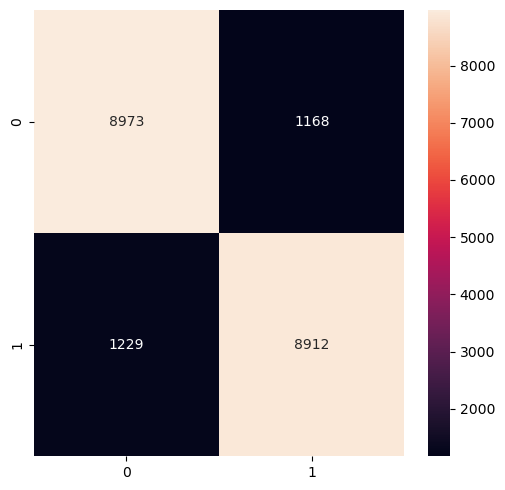

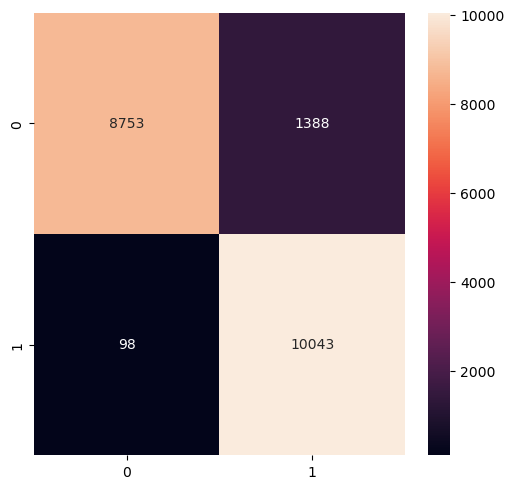

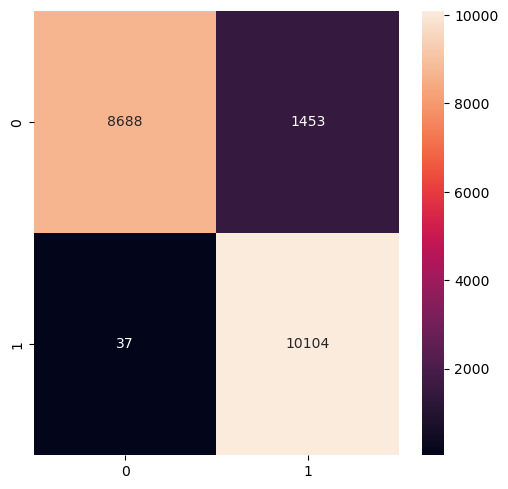

In [70]:
def evaluate_model(model, X_test, y_test,subplot_index):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    

    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", classification_rep)
    plt.figure(figsize=(15,5))
    plt.subplot(subplot_index)
    sns.heatmap(conf_matrix, annot=True, fmt='d')
    plt.tight_layout()
    


evaluate_model(dt_model, X_test, y_test,131)
evaluate_model(rf_model, X_test, y_test,132)
evaluate_model(lr_model, X_test, y_test,133)

Check for overfitting or underfitting for Decision Tree

In [77]:
train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
test_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

print(f"Decision Tree - Training Accuracy: {train_accuracy}")
print(f"Decision Tree - Testing Accuracy: {test_accuracy}")

Decision Tree - Training Accuracy: 0.9999945215685845
Decision Tree - Testing Accuracy: 0.9267330638004142


Check for overfitting or underfitting for Logistic regression

In [79]:
train_accuracy = accuracy_score(y_train, lr_model.predict(X_train))
test_accuracy = accuracy_score(y_test, lr_model.predict(X_test))

print(f"Logistic regression - Training Accuracy: {train_accuracy}")
print(f"Logistic regression - Testing Accuracy: {test_accuracy}")

Logistic regression - Training Accuracy: 0.9277175759036672
Logistic regression - Testing Accuracy: 0.9263386253821122


Check for overfitting or underfitting for Random Forest

In [80]:
train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
test_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

print(f"Random Forest - Training Accuracy: {train_accuracy}")
print(f"Random Forest - Testing Accuracy: {test_accuracy}")

Random Forest - Training Accuracy: 0.9999945215685845
Random Forest - Testing Accuracy: 0.9267330638004142


Features importances

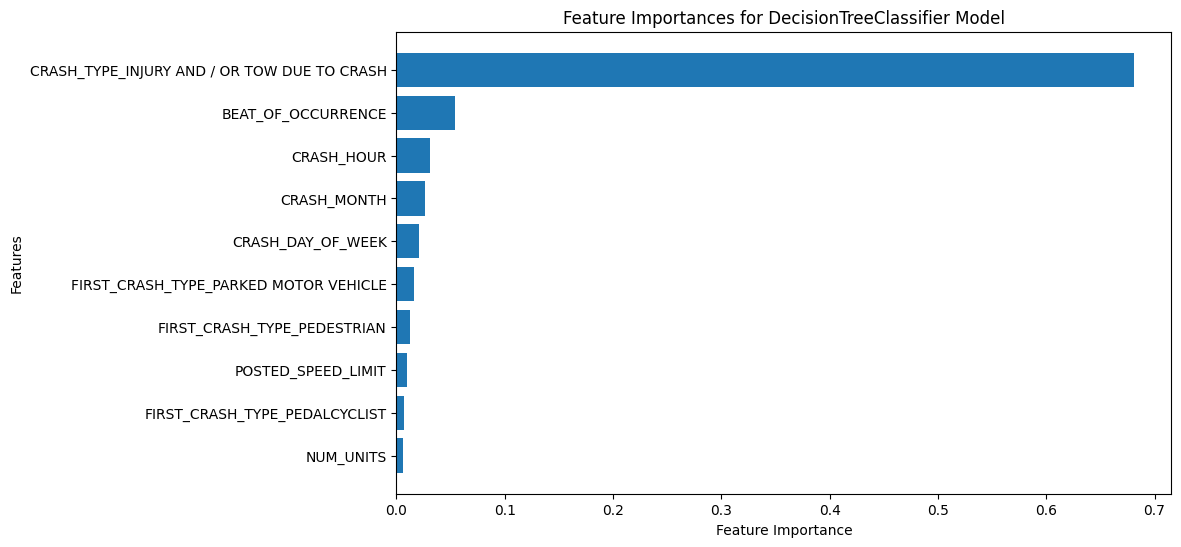

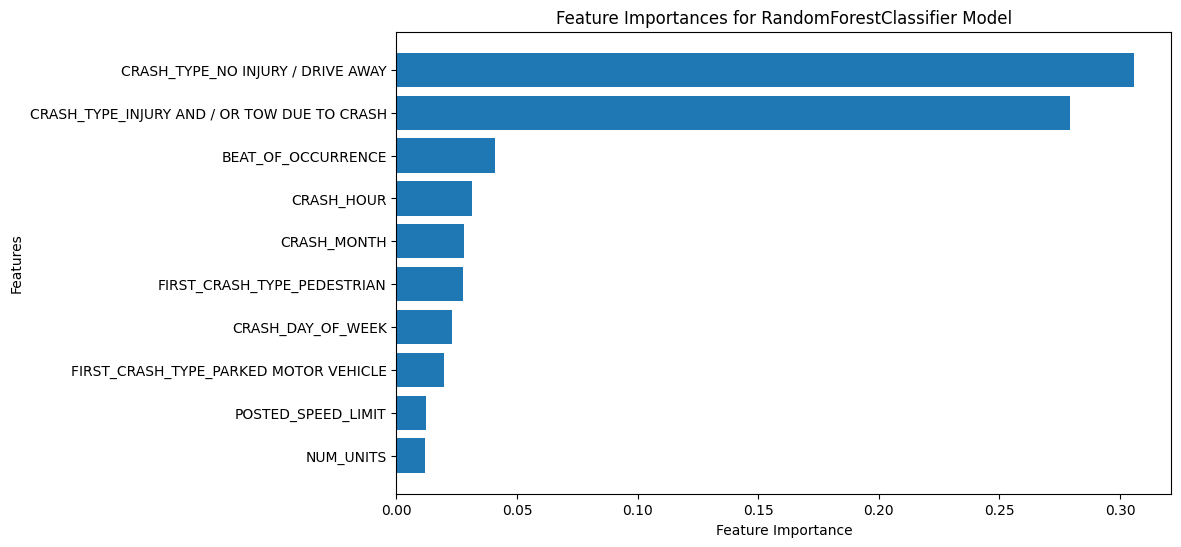

In [83]:
def plot_feature_importance(model, features):
    feature_importances = model.feature_importances_
    features, feature_importances = zip(*sorted(zip(features, feature_importances),  key=lambda x: x[1]))
    features, feature_importances = features[-10:], feature_importances[-10:]
    plt.figure(figsize=(10, 6))
    plt.barh(features, feature_importances)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title(f'Feature Importances for {model.__class__.__name__} Model')
    plt.show()


plot_feature_importance(dt_model, X_train.columns)
plot_feature_importance(rf_model, X_train.columns)

In [84]:
feature_importances = rf_model.feature_importances_
column_name = sampled_df.columns[np.argmax(feature_importances)]
print(column_name)

CRASH_TYPE_INJURY AND / OR TOW DUE TO CRASH


#### Interpretation

#### References